<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge S3: Prophet 
# Personas que ven un escaparate de una tienda

Una cadena de retail está interesada en realizar una previsión de las personas que ven el escaparate de su tienda ya que es una variable que afecta directamente a las ventas de la tienda. Durante dos años ha generado un histórico diario de personas que se han parado a ver el escaparate de una tienda céntrica de Madrid, colocando un dispositivo de IoT que detecta el número de personas que se paran en una tienda y deciden que sólo si la persona permanece más de 3 segundos parado en frente del escaparate se contará como persona que ha visto el escaparate.

Nos piden realizar una previsión para el próximo año a los datos históricos que tenemos.

Nuestro objetivo es:
1. Cargar las ventas en un DataFrame (tenemos un csv con los datos de partida: personas_escaparate.csv)
2. Preparar el DataFrame para cargar en un modelo que asumiremos como ADITIVO en Prophet.
3. Ajustar el modelo.
4. Analizar las previsiones y errores.
5. Mejorar nuestro modelo de previsión incluyendo algún evento especial.

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Cargar las ventas en un DataFrame

In [2]:
df = pd.read_csv('personas_escaparate.csv')

In [3]:
df.head()

fecha  valor
0  1/1/15   3947
1  2/1/15   3634
2  3/1/15   4105
3  4/1/15   3564
4  5/1/15   3387

In [4]:
df.describe()

valor
count   731.000000
mean   3434.804378
std     654.027471
min    2313.000000
25%    2999.500000
50%    3374.000000
75%    3800.000000
max    6719.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
fecha    731 non-null object
valor    731 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


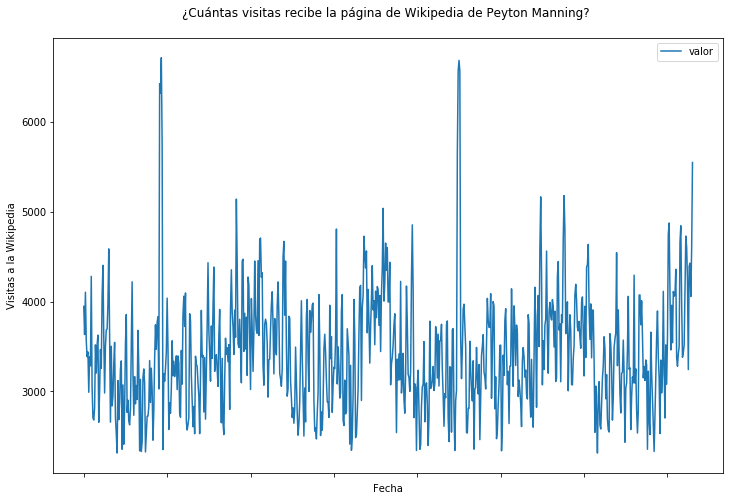

In [6]:
## Representamos nuestra serie temporal
ax = df.set_index('fecha').plot(figsize = (12, 8),
                                      title = '¿Cuántas visitas recibe la página de Wikipedia de Peyton Manning? \n')
ax.set_ylabel('Visitas a la Wikipedia')
ax.set_xlabel('Fecha')

plt.show()

## 2. Preparar el DataFrame para cargar en un modelo Prophet.

In [7]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
fecha    731 non-null datetime64[ns]
valor    731 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [9]:
df= df.rename(columns={'fecha': 'ds', 'valor': 'y'})

In [10]:
df.tail()

ds     y
726 2016-12-27  4395
727 2016-12-28  4429
728 2016-12-29  4057
729 2016-12-30  4589
730 2016-12-31  5551

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
ds    731 non-null datetime64[ns]
y     731 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


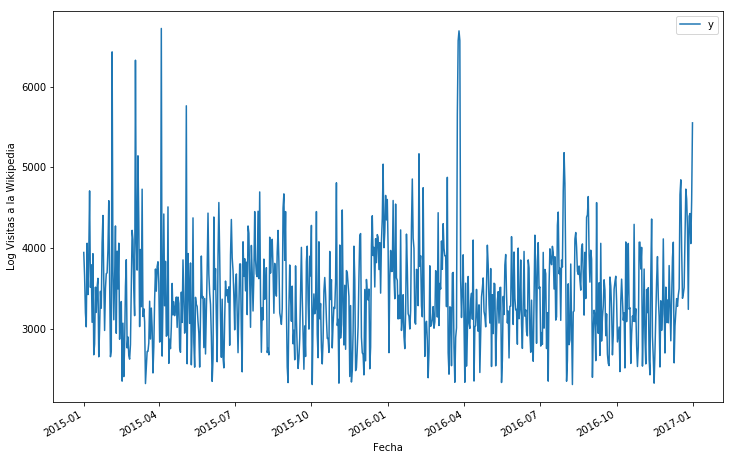

In [12]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Log Visitas a la Wikipedia')
ax.set_xlabel('Fecha')

plt.show()

## 3. Ajustar el modelo

In [13]:
modelo = Prophet()

In [14]:
modelo.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## 4. Analizar las previsiones y errores.

In [15]:
futuro = modelo.make_future_dataframe(periods=365)

In [16]:
futuro.tail()

ds
1091 2017-12-27
1092 2017-12-28
1093 2017-12-29
1094 2017-12-30
1095 2017-12-31

In [17]:
prevision = modelo.predict(futuro)

Visualización de las componentes de la serie

In [18]:
prevision.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
1091 2017-12-27  3485.390408  3274.654399  4851.979140  3484.510523   
1092 2017-12-28  3485.461148  3232.189296  4817.207753  3484.575360   
1093 2017-12-29  3485.531887  3403.950955  4932.584869  3484.637017   
1094 2017-12-30  3485.602626  3778.994701  5186.917222  3484.703978   
1095 2017-12-31  3485.673366  3349.789880  4840.883285  3484.770089   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1091  3486.288804      546.371880            546.371880            546.371880   
1092  3486.362985      543.476350            543.476350            543.476350   
1093  3486.437471      715.283415            715.283415            715.283415   
1094  3486.512521     1005.687678           1005.687678           1005.687678   
1095  3486.587425      622.479367            622.479367            622.479367   

          weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
1091 -127.996088   -127.996088   -127.996088  674.367968    674.367968   
1092 -104.027106   -104.027106   -104.027106  647.503455    647.503455   
1093  100.158553    100.158553    100.158553  615.124862    615.124862   
1094  427.618980    427.618980    427.618980  578.068698    578.068698   
1095   85.238326     85.238326     85.238326  537.241041    537.241041   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1091    674.367968                   0.0                         0.0   
1092    647.503455                   0.0                         0.0   
1093    615.124862                   0.0                         0.0   
1094    578.068698                   0.0                         0.0   
1095    537.241041                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
1091                         0.0  4031.762288  
1092                         0.0  4028.937497  
1093                         0.0  4200.815302  
1094                         0.0  4491.290304  
1095                         0.0  4108.152732

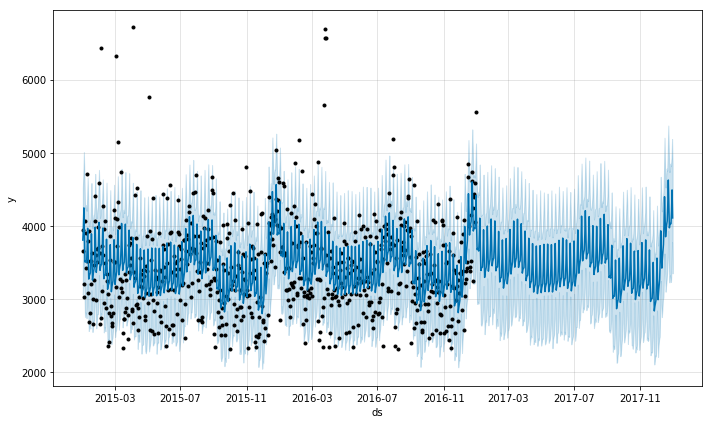

In [19]:
modelo.plot(prevision);

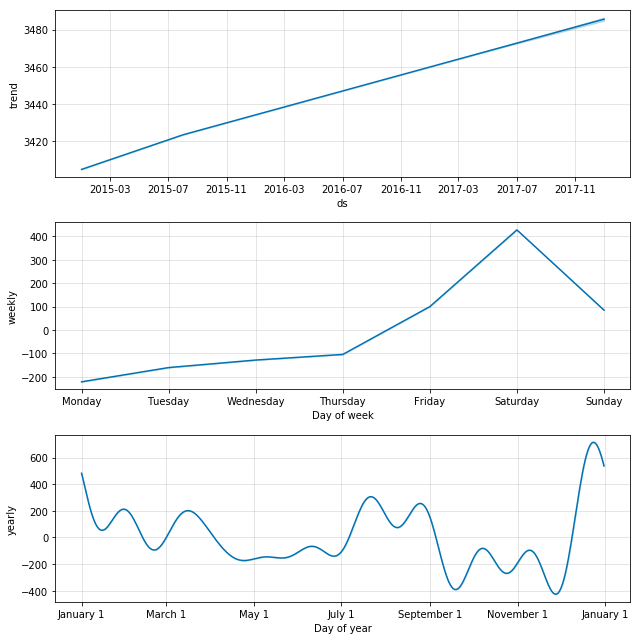

In [20]:
modelo.plot_components(prevision, weekly_start = 1);

### ¿Qué podríamos incluir para mejorar nuestro modelo? ¿dónde nos equivocamos especialmente?

Podríamos incluir algunos días festivos ya que la gente se parará mås en los escaparates durante esos días. En este caso, se pueden ver más outliers en los meses de marzo; tanto en 2015 como en 2016, por lo que he puesto los días de Semana Santa de esos años para intentar mejorar el modelo.

## 5. Mejorar nuestro modelo de previsión incluyendo algún evento especial.

In [21]:
easter = pd.DataFrame({
  'holiday': 'easter',
  'ds': pd.to_datetime(['2015-03-29', '2015-03-30', '2015-03-31', 
                        '2015-04-01', '2015-04-02', '2015-04-03',
                        '2015-03-01', '2015-03-02', '2015-03-03', 
                        '2016-03-20', '2016-03-21', '2016-03-22', 
                        '2016-03-23', '2016-03-24', '2016-03-25',
                        '2017-04-09', '2017-04-10', '2017-04-11',
                        '2017-04-12', '2017-04-13', '2017-04-14',
                        '2017-04-15', '2017-04-16']),
  'lower_window': 0,
  'upper_window': 1,
})

#se han añadido los de 2017 también para tenerlos en cuenta en la predicción futura

In [22]:
easter

holiday         ds  lower_window  upper_window
0   easter 2015-03-29             0             1
1   easter 2015-03-30             0             1
2   easter 2015-03-31             0             1
3   easter 2015-04-01             0             1
4   easter 2015-04-02             0             1
5   easter 2015-04-03             0             1
6   easter 2015-03-01             0             1
7   easter 2015-03-02             0             1
8   easter 2015-03-03             0             1
9   easter 2016-03-20             0             1
10  easter 2016-03-21             0             1
11  easter 2016-03-22             0             1
12  easter 2016-03-23             0             1
13  easter 2016-03-24             0             1
14  easter 2016-03-25             0             1
15  easter 2017-04-09             0             1
16  easter 2017-04-10             0             1
17  easter 2017-04-11             0             1
18  easter 2017-04-12             0             1
19  easter 2017-04-13             0             1
20  easter 2017-04-14             0             1
21  easter 2017-04-15             0             1
22  easter 2017-04-16             0             1

In [23]:
easter = easter.reset_index()  # THE FIX
modelo2 = Prophet(holidays=easter)
prevision2 = modelo2.fit(df).predict(futuro)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Comparativa de ambos modelos

Text(0.5, 1.0, 'Modelo con S.Santa')

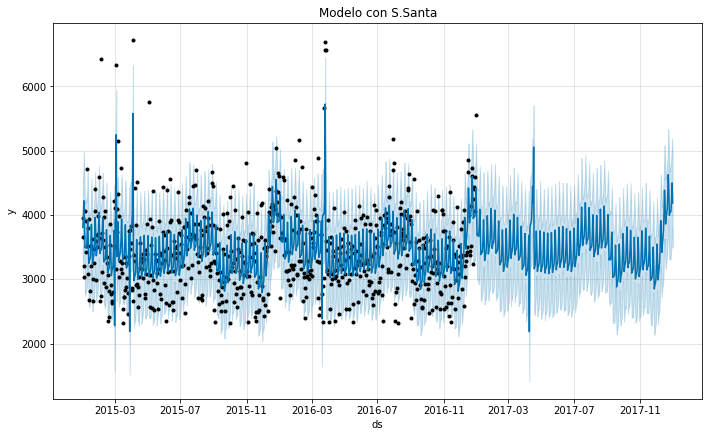

In [24]:
#Modelo tras aplicar los días de semana santa
modelo2.plot(prevision2);
plt.title('Modelo con S.Santa')

Text(0.5, 1.0, 'Modelo inicial')

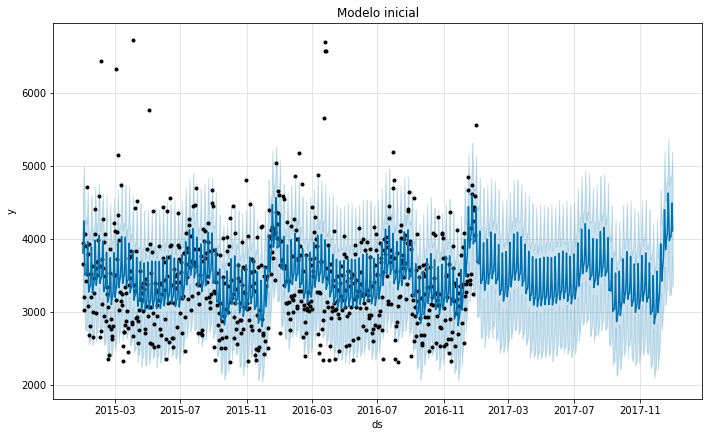

In [25]:
modelo.plot(prevision);
plt.title('Modelo inicial')

Como se puede observar, tras añadir los días en los que se obtenían valores más atípicos debidos a eventos especiales, nuestra predicción ha mejorado.